### Ejercicio 14
Bisección
* *Requiere que el intervalo introducido cumpla $f(a)\cdot f(b) \leq 0 $ *

In [6]:
def envoltorio_biseccion(f, a, b, E):
    if f(a) == 0:
        return (a, a)
    if f(b) == 0:
        return (b, b)
    if f(a)*f(b) > 0:
        return -1
    return biseccion (f, a, b, E)

def biseccion(f, a, b, E):
    if abs(f(a) - f(b)) < E:
        return (a, b)
    else:
        medio = (a + b)/2
        if f(medio) == 0:
            return (medio, medio)
        elif f(a) * f(medio) < 0:
            return biseccion(f, a, medio, E)
        else:
            return biseccion(f, medio, b, E)

def f(x):
    return x^3

show(envoltorio_biseccion(f, -1, 1000, 10^-5))


(-471/65536, 265/32768)

### Ejercicio 15
Interpolación de Newton

No tiene pinta ed ue te pidan el algoritmo, asi que lo hago aparte

### Ejercicio 16
Bernstein

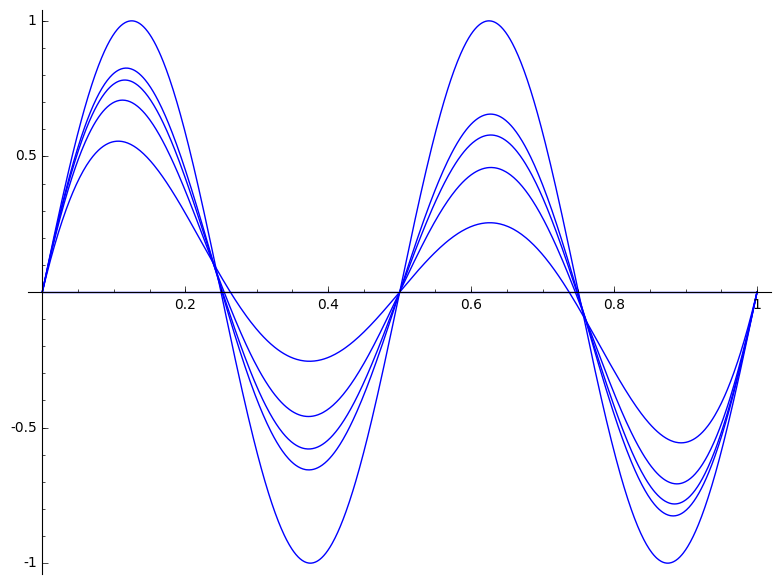

In [6]:
def bernstein(n, f):
    b = 0
    for i in srange(0, n+1):
        b += binomial(n, i)*f(i/n)*(1-x)^(n - i)*x^i
    return b
def f(x):
    return sin(4*pi*x)

L = []
L.append(plot(f, (0, 1)))
for i in srange(4, 49, 10):
    L.append(plot(bernstein(i, f), (0, 1)))
show(sum(L))

### Ejercicio 17
El número e


In [7]:
def e_1(sup):
    return (1 + 1/sup)^sup
def e_2(sup):
    s = 0
    for i in srange(0, sup+1):
        s += 1/factorial(i)
    return s
def e_3(sup):
    if sup < 3:
        return -1
    l = sup^sup
    l = l/((sup - 1)^(sup - 1))
    l = l - (((sup - 1)^(sup - 1))/((sup - 2)^(sup - 2)))
    return l


In [21]:
%time show(e_1(100000000).n(prec = 100))
%time show(e_2(1000).n(prec = 100))
%time show(e_3(1000000).n(prec = 100))

2.7182818148676362176529772430

CPU times: user 27.4 s, sys: 400 ms, total: 27.8 s
Wall time: 27.8 s


2.7182818284590452353602874714

CPU times: user 48 ms, sys: 0 ns, total: 48 ms
Wall time: 47.5 ms


2.7182818284591584973296638038

CPU times: user 13.4 s, sys: 0 ns, total: 13.4 s
Wall time: 13.4 s


In [22]:
show(e_1(100000000).n(prec = 100))
show(e_2(1000).n(prec = 100))
show(e_3(1000000).n(prec = 100))
show(exp(1).n(prec = 100))

2.7182818148676362176529772430

2.7182818284590452353602874714

2.7182818284591584973296638038

2.7182818284590452353602874714

**El método óptimo es el segundo,** ya que es el que menos tiempo (y menor sup) necesita para obtener *e* con 100 bits de precisión.

El primer método es el peor ya que, a pesar de haberlo usado con un parámetro sup bastante grande (100000000) y de haber tardado 27 segundos, sólo ha obtenido 7 decimales correctos de *e*.

El tercer método alcanza más precisión para *e* con un menor sup que el primero, pero necesita aún así 13 segundos para obtener 12 decimales correctos de *e*, lo cual es bastante peor que el segundo método.


### Ejercicio 18
Serie que se parece a 1/81 pero no lo es :)

In [23]:
tanh?

In [47]:
def serie(sup):
    s = 0
    for n in srange(1, sup + 1):
        s += floor(n*tanh(pi))/10^n
    return s
show(serie(300).n(digits = 272))
show((1/81).n(digits = 272))

0.012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345667901

0.012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012

### Ejercicio 19
Stirling for life

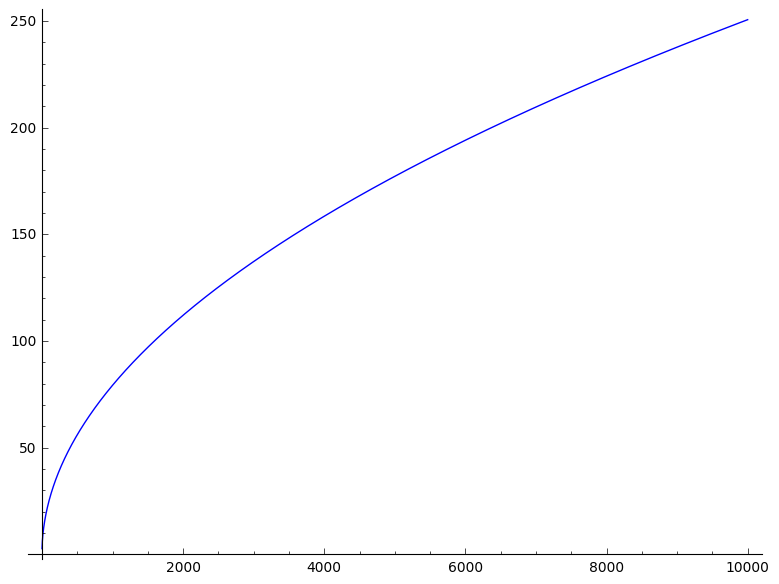

In [1]:
def f(n):
    return (factorial(n)*n^(-n)*e^n).n(digits = 200)
L = []
for n in srange(1, 10000):
    L.append((n, f(n)))
    
line2d(L)

In [2]:
f(50000)

560.50005580577406189844956145987845526252598437268729773841292385328039280538379908623270428510513012161861514352888906973515914281530526086418375470549354030245855738625037987955178725626105444723510

In [12]:
var('m n')
model(x) = n * x^m
find_fit(L, model)

[m == 0.49996669087283374, n == 2.50739742405451]

Según Wikipedia, el cociente debería dar $\sqrt{2 \pi n}$ así que pinta bien mi m $ \left( 0.4999 \approx \frac{1}{2} \right) $, ya veremos si  $\sqrt{2 \pi} \approx 2.5 $ 

In [13]:
sqrt(2*pi).n()

2.50662827463100

Pues 